## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.
**Answer**: Number of rows = 294478

In [3]:
# exloring the df shape
df.shape

(294478, 5)

c. The number of unique users in the dataset.
**Answer**: Number of unique users = 290584 

In [4]:
# counting the unique values
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted. **Answer**: The proportion of users converted = 12.1%

In [5]:
# getting the proportion by counting the unique user who converted and divide by the total number of unique users 
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.**Answer** number of times = 3893

In [6]:
#creating a sub df holding values where group = treatment and landing page = old 
df_line_up1 = df[(df['group'] == "treatment") & (df['landing_page'] == "old_page")]
#creating a sub df holding values where group = control and landing page = new
df_line_up2 = df[(df['group'] == "control") & (df['landing_page'] == "new_page")]
#merging the 2 above filter Dfs to get the totals 
df_line_up_total = pd.concat([df_line_up1 , df_line_up2], axis=0)

In [7]:
# counting the undique values 
df_line_up_total.nunique()

user_id         3893
timestamp       3893
group              2
landing_page       2
converted          2
dtype: int64

f. Do any of the rows have missing values? **Answer** missing values = 0 "False" 

In [8]:
# checking NaN values VS all columns 
df.isna().value_counts()

user_id  timestamp  group  landing_page  converted
False    False      False  False         False        294478
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# creating a a sub data frame with a filter where group = treatment and landing page = new 
df_filter1 = df[(df['group'] == "treatment") & (df['landing_page'] == "new_page")]
# creating a a sub data frame with a filter where group = coontrol and landing page = old 
df_filter2 = df[(df['group'] == "control") & (df['landing_page'] == "old_page")]
# merging the 2 new filtered data frames in df2
df2 = pd.concat([df_filter1 , df_filter2], axis=0)
#df2 head
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**? **Answer** = 290584

In [11]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it? **Answer** id = 773192     

In [12]:
# Creating a filter for duplicates 
df_duplicated_filter = df2[df2.duplicated(subset= 'user_id', keep='first')]
# printing the info 
print(df_duplicated_filter)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? **Answer** info = 2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


In [13]:
# printing the info 
print(df_duplicated_filter)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# dropping duplicates in "user_id"
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"')["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"')["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
#### Statistical Analysis: 

<font color='black'>- Considering that the probability of a user landing on the old_page converting is </font><font color='green'> 12% </font> which is higher than the overall mean of <font color='blue'> 11.9% </font> and that of a user landing in the new page of <font color='red'> 11.8% </font> hence staying with the old page would be advised 
#### Practical Analysis:
<font color='black'>- Given that the above results could have been affected by different user biases and also not taking into
    consideration other factors such as cost further analysis would be advised  </font>
    

 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<font color='black'>-**$H_0$** : **$p_{new}$** ≤ **$p_{old}$**</font>

<font color='black'>-**$H_1$** : **$p_{new}$** > **$p_{old}$**</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [70]:
#Convert rate uncorrelated to group type
p_new = df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [72]:
#Convert rate uncorrelated to group type
p_old = df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()
print(p_old)
#p_new - p_old
convert_diff = p_new - p_old
print(convert_diff)

0.11959708724499628
0.0


c. What is $n_{new}$?

In [21]:
#number of unique users who got the new page
n_new = df2.query('group == "treatment"').user_id.nunique()
print(n_new)

145310


d. What is $n_{old}$?

In [22]:
#number of unique users who got the old page
n_old = df2.query('group == "control"').user_id.nunique()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [82]:
#new_page_converted = []
#size = df2.shape[0]
#for _ in range(20):
    #new_sample = df2.sample(size, replace=True)
    #treatment_df = new_sample.query('group == "treatment"')
    #conv_samp_new = treatment_df.query('converted == 1').user_id.nunique() / treatment_df.user_id.nunique()
    #new_page_converted.append(conv_samp_new)
#using np.random.choice
new_page_converted = np.random.choice([1, 0], n_new,replace = True,p = [p_new, 1-p_new])


In [83]:
new_page_converted = np.array(new_page_converted)
new_page_converted.mean()

0.11952377675314844

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [86]:
#old_page_converted = []
#size = df2.shape[0]
#for _ in range(20):
    #old_sample = df2.sample(size, replace=True)
    #control_df = old_sample.query('group == "control"')
    #conv_samp_old = control_df.query('converted == 1').user_id.nunique() / control_df.user_id.nunique()
    #old_page_converted.append(conv_samp_old)
#using np.random.choice
old_page_converted = np.random.choice([1, 0], n_old,replace = True,p = [p_old, 1-p_old])

In [91]:
old_page_converted = np.array(old_page_converted)
old_page_converted.mean()
 


0.11858281592026103

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [92]:
#diff = np.subtract(new_page_converted,old_page_converted )
#print(diff)
#Revision 
new_page_converted.mean() - old_page_converted.mean()

0.0009409608328874164

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [93]:
p_diffs = []
#size = df2.shape[0]
for _ in range(10000):
    #main_sample = df2.sample(size, replace=True)
    #control_df = main_sample.query('group == "control"')
    #conv_samp_old = control_df.query('converted == 1').user_id.nunique() / control_df.user_id.nunique()
    #treatment_df = main_sample.query('group == "treatment"')
    #conv_samp_new = treatment_df.query('converted == 1').user_id.nunique() / treatment_df.user_id.nunique()
    #p_diffs.append(conv_samp_new - conv_samp_old)
#using np.random.choice
    new_page_converted = np.random.choice([1, 0], n_new,replace = True,p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0], n_old,replace = True,p = [p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [94]:
# creating a numpy array from p_diffs
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

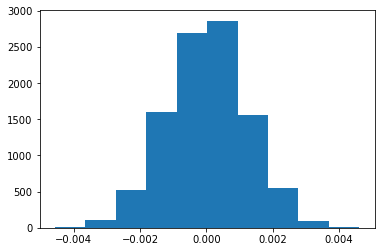

In [95]:
#plot
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [96]:
# Simulate distribution under the null hypothesis
#null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(obs_diff)

-0.0015782389853555567


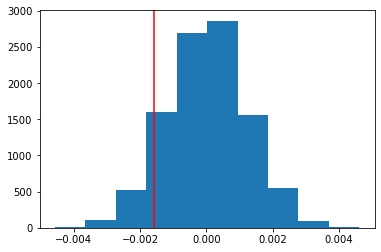

In [97]:
# Plot observed statistic with the null distibution
plt.hist(p_diffs);
plt.axvline(obs_diff, c='red')

In [98]:
#p-value
(obs_diff > p_diffs).mean()

0.0934

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** we fail to reject the null hypothesis as p-value at 9.34% is higher than the acceptable alpha error risk value of 5% , its advised to stay with the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

#creating variables for the z-test
#place holder to filer DF to count 
df_filter3 = df2[(df2['group'] == "control") & (df2['converted'] == 1)]
df_filter4 = df2[(df2['group'] == "treatment") & (df2['converted'] == 1)]
convert_old_z = df_filter3.query('converted == 1').user_id.nunique()
convert_new_z = df_filter4.query('converted == 1').user_id.nunique()
#place holder to filer DF to count 
df_filter5 = df2[(df2['group'] == "control")]
df_filter6 = df2[(df2['group'] == "treatment")]
n_old_z = df_filter5['group'].count()
n_new_z = df_filter6['group'].count()
print(convert_old_z)
print(convert_new_z)
print(n_old_z)
print(n_new_z)
#creating lists for the the numpy array 
count_array_list = [17489,17264]
nobs_array_list = [145274,145310]
count_array = np.array(count_array_list)
nobs_array = np.array(nobs_array_list)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [101]:
#the z-test 
(z_test_result, p_value) = proportions_ztest(count_array, nobs_array, alternative='larger')
print("test results = ",z_test_result)
print("p-value = ",p_value)

test results =  1.3109241984234394
p-value =  0.09494168724097551


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**? 

**Put your answer here.**
from the z-test result we fail to reject the null H0 as P-value is larger than the 0.05 alpa risk, the results are the same from points J & K .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** logistic regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [102]:
# creating a dummy column where when = treatment = 1 else = 0
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
# creating intercept = 1
df2['intercept'] = 1
# checking change head
df2.head(-1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1
...,...,...,...,...,...,...,...
294470,908354,2017-01-11 02:42:21.195145,control,old_page,0,0,1
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,0,1
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [103]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:               8.077e-06
Time:                        13:12:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


**Put your answer here.** 
**ab_page = -0.0150 which means difference in likely hood of conversion between the old and new pages is negligible**
P-value = 0.190 hence we fail to reject the null H0 as 0.19 is > than 0.05, and this a similar results from Part II

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model? 

**Put your answer here.** it could lead to better accuracy however it could affect the outcome if we have an unbalanced datasets

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [118]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
#checking the countries in list 
df_new.groupby("country").count()

,timestamp,group,landing_page,converted,ab_page,intercept
country,,,,,,
CA,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619


In [123]:
### Create the necessary dummy variables
# creating a dummy column where when = treatment = 1 else = 0
df_new['country_uk'] = pd.get_dummies(df_new['country'])["UK"]
df_new['country_ca'] = pd.get_dummies(df_new['country'])['CA']
df_new['country_us'] = pd.get_dummies(df_new['country'])['US']

#establishing correlation between country and ab_page 
df_new['country_uk_ab_page'] = df_new["country_uk"]*df_new["ab_page"]
df_new['country_ca_ab_page'] = df_new["country_ca"]*df_new["ab_page"]
df_new['country_us_ab_page'] = df_new["country_us"]*df_new["ab_page"]
#dropping
df_new.drop('country_us_ab_page', axis = 1,  inplace=True)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [125]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept',"country_uk",'country_ca',"ab_page", 'country_uk_ab_page','country_ca_ab_page' ]])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:               3.482e-05
Time:                        13:29:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.9865      0.010   -206.344      0.000      -2.005      -1.968
country_uk            -0.0057      0.019     -0.306      0.760      -0.043       0.031
country_ca            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_page               -0.0206      0.014     -1.505      0.132      -0.047       0.006
country_uk_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
country_ca_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
======================================================================================
"""

<a id='conclusions'></a>
## Conclusions

Based on the tests performed "Statistical tests, Z-test, Logistic regression model) both old and new pages have a very similar chance of converting users, and the risk of alpa error (p_value) is higher than the acceptable range (0.05) therefore we recommend to the e-commerce company to stay with the old page and not to launch the new page 
### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.